# VGG-16 재훈련
## VGG-16 Model
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

# I. Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 구글 드라이브 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


> ## 2) unzip 'dogs_and_cats_small.zip'

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [ ]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 24 06:54 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 24 06:54 test
drwxr-xr-x 4 root root 4096 Mar 24 06:54 train
drwxr-xr-x 4 root root 4096 Mar 24 06:54 validation


# II. Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [ ]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# III. Data Preprocessing

> ## 1) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255 ,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   fill_mode = 'nearest')
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (180, 180),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (180, 180),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (180, 180),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


# IV. Import VGG-16 Model

> ## 1) conv_base

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (180, 180, 3))

# V. Keras CNN Modeling with VGG-16

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               6554112   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 21,269,313
Trainable params: 21,269,313
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000005)

In [ ]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max' ,
                   patience = 50,
                   verbose = 1)

mc = ModelCheckpoint('best_dandc.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     save_best_only = True,
                     verbose = 1)

> ## 3) Model Fit

* 약 35분

In [ ]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 500,
                       validation_data = valid_generator,
                       validation_steps = 50,
                       callbacks = [es, mc],
                       verbose = 1)

Epoch 1/500
100/100 [==============================] - 38s 316ms/step - loss: 0.7425 - accuracy: 0.5353 - val_loss: 0.5160 - val_accuracy: 0.7910

Epoch 00001: val_accuracy improved from -inf to 0.79100, saving model to best_dandc.h5
Epoch 2/500
100/100 [==============================] - 31s 304ms/step - loss: 0.5870 - accuracy: 0.6753 - val_loss: 0.3968 - val_accuracy: 0.8080

Epoch 00002: val_accuracy improved from 0.79100 to 0.80800, saving model to best_dandc.h5
Epoch 3/500
100/100 [==============================] - 31s 307ms/step - loss: 0.4531 - accuracy: 0.7851 - val_loss: 0.2763 - val_accuracy: 0.8910

Epoch 00003: val_accuracy improved from 0.80800 to 0.89100, saving model to best_dandc.h5
Epoch 4/500
100/100 [==============================] - 31s 306ms/step - loss: 0.3716 - accuracy: 0.8455 - val_loss: 0.2028 - val_accuracy: 0.9180

Epoch 00004: val_accuracy improved from 0.89100 to 0.91800, saving model to best_dandc.h5
Epoch 5/500
100/100 [==============================] - 

> ## 4) 학습 결과 시각화

* Loss & Accuracy Visualization

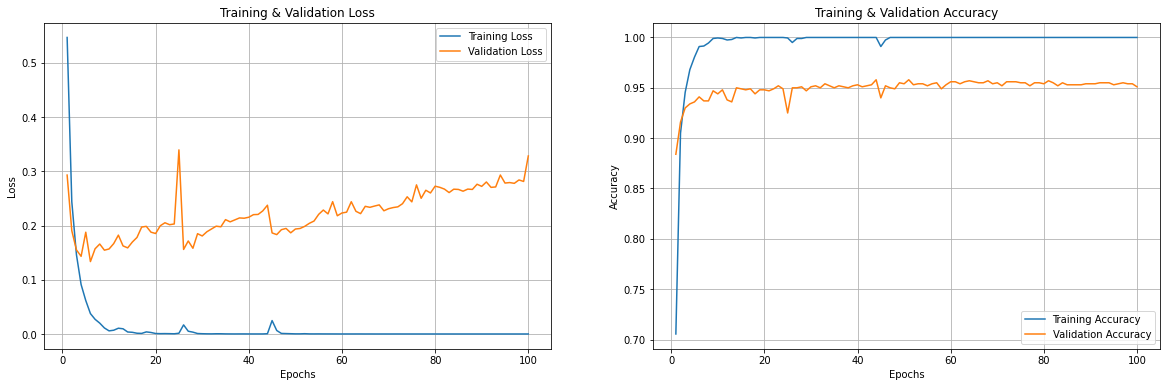

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 80ms/step - loss: 0.2220 - accuracy: 0.9620
Loss = 0.22197
Accuracy = 0.96200


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/009_dogs_and_cats_VGG16.h5')

In [ ]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 728610
-rw------- 1 root root     34592 Mar 18 02:42 001_Model_iris.h5
-rw------- 1 root root  41498896 Mar 23 02:18 002_dogs_and_cats_small.h5
-rw------- 1 root root  41501624 Mar 23 07:12 003_dogs_and_cats_augmentation.h5
-rw------- 1 root root  39879700 Mar 23 06:41 004_logo_classification_with_augmentation.h5
-rw------- 1 root root  25199032 Mar 24 05:22 006_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 201873880 Mar 24 07:31 007_dogs_and_cats_VGG16.h5
-rw------- 1 root root 140748400 Mar 24 07:36 008_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root 255358264 Mar 24 09:10 009_dogs_and_cats_VGG16.h5


> ## 3) Model Load

In [ ]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/009_dogs_and_cats_VGG16.h5')

In [ ]:
loss, accuracy = model_google.evaluate(test_generator,
                                       steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 81ms/step - loss: 0.2220 - accuracy: 0.9620
Loss = 0.22197
Accuracy = 0.96200


# 
# 
# 
# The End
# 
# 
# 